Register for the competition and download the data: 

https://www.kaggle.com/t/58b8ee1858b6446e81b7d3ebfbaa6922

In [ ]:
!wget https://raw.githubusercontent.com/vikram-sundar/ML4MolEng_Spring2022/master/psets/ps6-cancer/data/ImmuneSignatures160.csv
!wget https://raw.githubusercontent.com/vikram-sundar/ML4MolEng_Spring2022/master/psets/ps6-cancer/data/covariates_train.csv
!wget https://raw.githubusercontent.com/vikram-sundar/ML4MolEng_Spring2022/master/psets/ps6-cancer/data/covariates_test.csv
!wget https://raw.githubusercontent.com/vikram-sundar/ML4MolEng_Spring2022/master/psets/ps6-cancer/data/survival_train.csv

--2022-05-06 16:22:56--  https://raw.githubusercontent.com/vikram-sundar/ML4MolEng_Spring2022/master/psets/ps6-cancer/data/ImmuneSignatures160.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19203382 (18M) [text/plain]
Saving to: ‘ImmuneSignatures160.csv.1’

ImmuneSignatures160 100%[===================>]  18.31M  --.-KB/s    in 0.1s    

2022-05-06 16:22:57 (131 MB/s) - ‘ImmuneSignatures160.csv.1’ saved [19203382/19203382]

--2022-05-06 16:22:57--  https://raw.githubusercontent.com/vikram-sundar/ML4MolEng_Spring2022/master/psets/ps6-cancer/data/covariates_train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|18

In [ ]:
import numpy as np 
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPRegressor, MLPClassifier

from sklearn.model_selection import KFold 
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

from numpy import mean
from numpy import std

import xgboost
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from xgboost import XGBRegressor

## Part 1: Characterizing Intra-Tumoral Immune States

### Part 1.1: (5 points) Visualization of Immune Modules

In [ ]:
# import file - immune signatures
genesig = pd.read_csv("ImmuneSignatures160.csv", index_col="Unnamed: 0")

# diverging colormap for visualizing standardized scores
cmap = sns.diverging_palette(220, 20, as_cmap=True)

/usr/local/lib/python3.7/dist-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


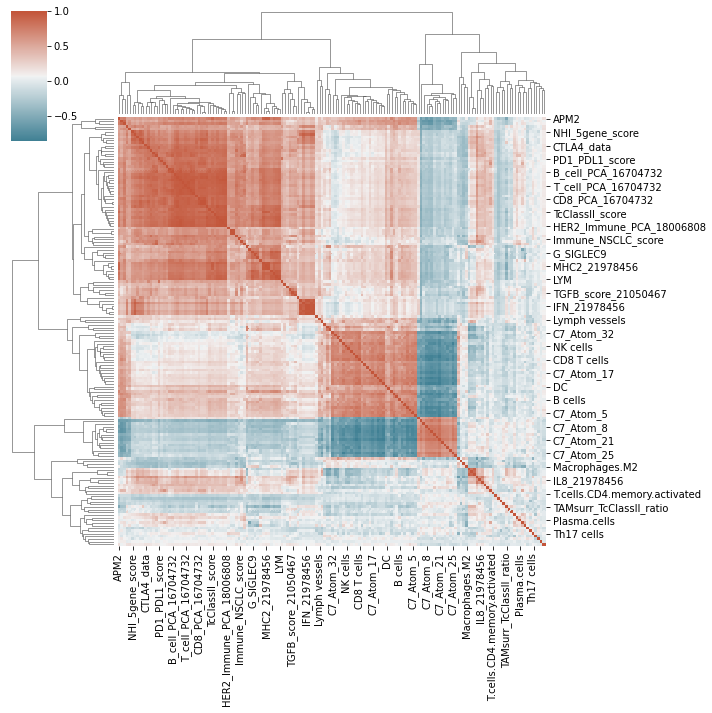

In [ ]:
# Immune Signature Cluster Modeling
corr = genesig.corr(method = 'pearson')
cmap = sns.diverging_palette(220, 20, as_cmap=True)
sns.clustermap(corr, cmap=cmap)

How many clusters can you observe? There is no single right answer; just provide a visual guess.

In [ ]:
"""
There appears to be approixmately 6 different clusters.
"""

### Part 1.2: (10 points) Clustering Analysis to Identify Modules

Compute the Silhouette Score for k ranging from 2 to 10, and pick the best value of k.

For n_clusters = 2 The average silhouette_score is : 0.46026729784713033
For n_clusters = 3 The average silhouette_score is : 0.4937569126590041
For n_clusters = 4 The average silhouette_score is : 0.5213301303715114
For n_clusters = 5 The average silhouette_score is : 0.4413645331770937
For n_clusters = 6 The average silhouette_score is : 0.3928551630158168
For n_clusters = 7 The average silhouette_score is : 0.393354456748216
For n_clusters = 8 The average silhouette_score is : 0.3260899740823923
For n_clusters = 9 The average silhouette_score is : 0.32242790625038537
For n_clusters = 10 The average silhouette_score is : 0.30927654092448476


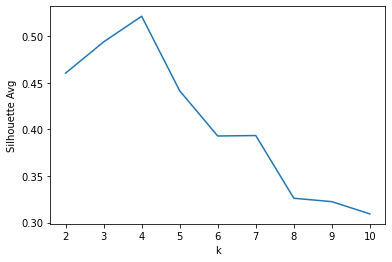


The best value of k is 4.


In [ ]:
averages = []

for n_clusters in range(2, 11):

    clusterer = KMeans(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(np.array(corr))

    silhouette_avg = silhouette_score(np.array(corr), cluster_labels)
    averages.append(silhouette_avg)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

fig, ax = plt.subplots()
ax.plot(list(range(2, 11)), averages)
ax.set(xlabel='k', ylabel='Silhouette Avg')
plt.show()

print("\nThe best value of k is 4.")

## Part 2: Baseline Prediction of Cancer Progression

### Part 2.1: (10 points) Train a Logistic Regressor

Report a 5-fold cross-validation AUC.

In [ ]:
covariates_train = pd.read_csv("covariates_train.csv", index_col="Unnamed: 0")
covariates_test = pd.read_csv("covariates_test.csv", index_col="Unnamed: 0")
survival_train = pd.read_csv("survival_train.csv")

y_train = survival_train['label']

In [ ]:
model = LogisticRegression(max_iter=1000)
scores = cross_val_score(model, covariates_train, y_train, scoring='roc_auc', cv=5)

print("The mean of CV scores is {:.2f}".format(np.mean(scores)) )
print("The std of CV scores is {:.2f}".format(np.std(scores)) )

The mean of CV scores is 0.70
The std of CV scores is 0.02


### Part 2.2: (10 points) Train a Random Forest Classifier

Report a 5-fold cross-validation AUC.

In [ ]:
model = RandomForestClassifier()
scores = cross_val_score(model, covariates_train, y_train, scoring='roc_auc', cv=5)

print("The mean of CV scores is {:.2f}".format(np.mean(scores)) )
print("The std of CV scores is {:.2f}".format(np.std(scores)) )

The mean of CV scores is 0.72
The std of CV scores is 0.02


## Part 3: (70 points) Machine Learning Competition and Report

You should submit probabilities for each sample instead of just 0s and 1s.

In [ ]:
def save_submission(barcode, predict_proba, filename):
    '''
    Utility function to dump submission csv files.
    
    barcode (list): list of patient barcode
    predict_proba (numpy.array): 1-D numpy array that contrains probabilities for 0 and 1
    filename (str): where you want to save your submission
    '''
    assert len(barcode) == len(predict_proba)
    #assert len(np.shape(predict_proba)) == 2
    
    submission = pd.DataFrame( {'bcr_patient_barcode': barcode, 'Predicted': predict_proba})
    submission.to_csv(filename, index=None)

You can start a new notebook here to put all your models.

In [ ]:
# train features
X_train_df = pd.read_csv("covariates_train.csv", index_col='Unnamed: 0')
# train labels
y_train_df = pd.read_csv("survival_train.csv", index_col='bcr_patient_barcode')
# test features 
X_test_df = pd.read_csv("covariates_test.csv", index_col='Unnamed: 0')

In [ ]:
# Vectorize the features for each datapoint
X_all_train = []
X_all_test = []
y_all_train = list(y_train_df['label'])

for i, row in X_train_df.iterrows():
  X_all_train.append(list(row))
for i, row in X_test_df.iterrows():
  X_all_test.append(list(row))

In [ ]:
# Scale the data to ensure the feature are values are closer together,
# thereby increasing algorithm training accuracy and efficiency

# For cross validation purposes
scaler = preprocessing.StandardScaler().fit(X_all_train)
X_all_train_scaled = scaler.transform(X_all_train)
X_all_test_scaled = scaler.transform(X_all_test)

# For non-cross validation purposes
# 80%-20% train validation split
X_train, X_valid, y_train, y_valid = train_test_split(X_all_train, y_all_train, test_size=0.2)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_all_test)

print(len(X_train), len(X_train[0]))
print(len(X_valid), len(X_valid[0]))

1608 189
403 189


# Model 1: MLP Regressor
A MLP Regressor was used because https://pubmed.ncbi.nlm.nih.gov/33922356/ states that neural networks are a preferred ML model for personalized medicine, with respect to cancer especially. MLPs were also chosen because they are good for mapping many numerical data inputs to outputs

In [ ]:
# MLPRegressor model w/o hyperparameter tuning
model = MLPRegressor()
scores = cross_val_score(model, X_all_train_scaled, y_all_train, scoring='roc_auc', cv=5)

print("The mean of CV scores is {:.2f}".format(np.mean(scores)) )
print("The std of CV scores is {:.2f}".format(np.std(scores)) )

The mean of CV scores is 0.61
The std of CV scores is 0.04


In [ ]:
# Do hyperparameter tuning for MLP Regressor parameters for the hidden layers,
# optimizer, activation function, and regularization
from hyperopt import hp
from hyperopt import fmin, tpe, space_eval, Trials


def hyperoptoutput2param(best):
    
    '''Change hyperopt output to dictionary with values '''
    
    for key in best.keys():
        if key in hyper_dict.keys():
            best[key] = hyper_dict[key][ best[key] ] 
            
    return best


# Define a dictionary for each parameter range 
hyper_dict = {
    "hidden_layers": [(512, 256, 128), (256, 128, 64), (512, 512, 256), (256, 256, 256)],
    "optimizer": ['sgd', 'adam'],
    "activation": ['relu', 'tanh'],
    "alpha":[0.08, 0.16, 0.32, 0.64, 0.80]
}

parameter_space =  { "hidden_layers": hp.choice("hidden_layers", hyper_dict['hidden_layers']),
            "optimizer": hp.choice("optimizer", hyper_dict['optimizer']), 
            "activation": hp.choice("activation", hyper_dict['activation']), 
            "alpha": hp.choice("alpha", hyper_dict['alpha'])
                    }

# Evaluation function 
# args should be a dict, with keys for number of hidden layers, optimizer, activation, and alpha
def model_eval(args):

    '''Take suggested arguments and perform model evaluation'''

    # your code here to train MLPRegressors and to run CV score on the training data 
    model = MLPRegressor(hidden_layer_sizes=args["hidden_layers"], solver=args["optimizer"], activation=args["activation"], alpha=args["alpha"], early_stopping=False)
    
    # return the negative of the CV score to ensure we maximize R^2 by minimizing the loss
    cv_score = np.mean(cross_val_score(model, X_train_scaled, y_train, scoring='r2', cv=5))
    return -cv_score


print("Start trials") 

trials = Trials()
best = fmin(model_eval, parameter_space, algo=tpe.suggest, max_evals=40, trials=trials) # this will take a while to run 
best = hyperoptoutput2param(best)

print("Best parameter set: {}".format(best))
print("Best loss from CV {:.2f}".format(-trials.best_trial['result']['loss']))


Start trials
  0%|          | 0/40 [00:00<?, ?it/s, best loss: ?]

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,



  2%|▎         | 1/40 [03:46<2:27:11, 226.45s/it, best loss: 0.31163077419307234]

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_m

  5%|▌         | 2/40 [06:10<1:52:32, 177.69s/it, best loss: -0.008792175828094263]

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_m

  8%|▊         | 3/40 [08:40<1:41:54, 165.26s/it, best loss: -0.008792175828094263]

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,



 10%|█         | 4/40 [10:57<1:32:33, 154.27s/it, best loss: -0.008792175828094263]

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,



 12%|█▎        | 5/40 [15:41<1:57:17, 201.07s/it, best loss: -0.008792175828094263]

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_m

 15%|█▌        | 6/40 [20:18<2:08:29, 226.74s/it, best loss: -0.018203653560487875]

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_m

 18%|█▊        | 7/40 [22:13<1:44:38, 190.25s/it, best loss: -0.018203653560487875]

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,



 20%|██        | 8/40 [23:33<1:22:44, 155.15s/it, best loss: -0.018203653560487875]

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_m

 22%|██▎       | 9/40 [24:34<1:04:53, 125.60s/it, best loss: -0.018203653560487875]

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_m

 25%|██▌       | 10/40 [29:08<1:25:45, 171.53s/it, best loss: -0.040377510486554136]

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,



 28%|██▊       | 11/40 [30:09<1:06:29, 137.56s/it, best loss: -0.040377510486554136]

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,



 30%|███       | 12/40 [34:34<1:22:23, 176.57s/it, best loss: -0.040377510486554136]

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_m

 32%|███▎      | 13/40 [37:43<1:21:04, 180.16s/it, best loss: -0.040377510486554136]

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_m

 35%|███▌      | 14/40 [39:36<1:09:18, 159.93s/it, best loss: -0.040377510486554136]

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_m

 38%|███▊      | 15/40 [40:53<56:11, 134.86s/it, best loss: -0.040377510486554136]  

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_m

 40%|████      | 16/40 [44:05<1:00:47, 152.00s/it, best loss: -0.040377510486554136]

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_m

 42%|████▎     | 17/40 [45:04<47:33, 124.05s/it, best loss: -0.040377510486554136]  

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_m

 45%|████▌     | 18/40 [49:35<1:01:40, 168.21s/it, best loss: -0.040377510486554136]

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_m

 48%|████▊     | 19/40 [51:30<53:20, 152.43s/it, best loss: -0.040377510486554136]  

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_m

 50%|█████     | 20/40 [54:49<55:27, 166.36s/it, best loss: -0.040377510486554136]

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_m

 52%|█████▎    | 21/40 [56:07<44:16, 139.82s/it, best loss: -0.040377510486554136]

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_m

 55%|█████▌    | 22/40 [1:01:30<58:23, 194.62s/it, best loss: -0.040377510486554136]

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_m

 57%|█████▊    | 23/40 [1:02:47<45:12, 159.55s/it, best loss: -0.040377510486554136]

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_m

 60%|██████    | 24/40 [1:08:07<55:21, 207.59s/it, best loss: -0.040377510486554136]

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_m

 62%|██████▎   | 25/40 [1:09:27<42:21, 169.45s/it, best loss: -0.040377510486554136]

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_m

 65%|██████▌   | 26/40 [1:15:12<51:48, 222.03s/it, best loss: -0.040377510486554136]

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_m

 68%|██████▊   | 27/40 [1:20:38<54:52, 253.23s/it, best loss: -0.040377510486554136]

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_m

 70%|███████   | 28/40 [1:21:38<39:01, 195.09s/it, best loss: -0.040377510486554136]

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,



 72%|███████▎  | 29/40 [1:22:53<29:09, 159.07s/it, best loss: -0.040377510486554136]

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,



 75%|███████▌  | 30/40 [1:27:36<32:43, 196.31s/it, best loss: -0.040377510486554136]

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,



 78%|███████▊  | 31/40 [1:30:07<27:25, 182.86s/it, best loss: -0.040377510486554136]

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_m

 80%|████████  | 32/40 [1:35:28<29:53, 224.13s/it, best loss: -0.040377510486554136]

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_m

 82%|████████▎ | 33/40 [1:36:26<20:21, 174.45s/it, best loss: -0.040377510486554136]

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_m

 85%|████████▌ | 34/40 [1:39:04<16:55, 169.32s/it, best loss: -0.040377510486554136]

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,



 88%|████████▊ | 35/40 [1:41:06<12:56, 155.31s/it, best loss: -0.040377510486554136]

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,



 90%|█████████ | 36/40 [1:43:42<10:21, 155.39s/it, best loss: -0.040377510486554136]

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_m

 92%|█████████▎| 37/40 [1:46:22<07:50, 156.84s/it, best loss: -0.040377510486554136]

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_m

 95%|█████████▌| 38/40 [1:49:07<05:18, 159.35s/it, best loss: -0.040377510486554136]

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,



 98%|█████████▊| 39/40 [1:51:42<02:38, 158.01s/it, best loss: -0.040377510486554136]

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,



100%|██████████| 40/40 [1:53:41<00:00, 170.54s/it, best loss: -0.040377510486554136]
Best parameter set: {'activation': 'relu', 'alpha': 0.8, 'hidden_layers': (512, 512, 256), 'optimizer': 'sgd'}
Best loss from CV 0.04


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,



In [ ]:
'''
Feature Selection with Univariate Statistical Tests
This preprocessing step is done to decrease the dimensionality of our data since
we have 189 features per datapoint, which can increase the possibility of overfitting
to our training dataset. Without domain knowledge, feature selection helps create
an accurate predictive model by identifying and removing irrelevant or unneeded
data attributes that do not contribute to the accuracy of a predictive model or
even decreases the accuracy of the model.
'''

# CROSS VALIDATION SCORES with feature Selection (Univariate Statistical Tests)

mean_cv = []
std_cv = []

# SelectKBest fit on train data, which selects the k best features
# iterate through k=10, 20, ..., 180 (exclusive) to find the best number of features that maximizes prediction accuracy
for i in range(10, 180, 10):
  print("Number of features:", i)
  # fit SelectKBest to the all the scaled X train data
  fit = SelectKBest(score_func=f_regression, k=i).fit(X_all_train_scaled, y_all_train)
  X_all_train_new = fit.transform(X_all_train_scaled)

  # fit the MLPRegressor (with optimized hyperparameters) to the all filtered X train data with k features
  # compute the mean and std of teh cross-validation scores
  regr = MLPRegressor(hidden_layer_sizes=(512, 512, 256), activation='relu', alpha=0.8, solver='sgd', early_stopping=True)
  n_scores = cross_val_score(regr, X_all_train_new, y_all_train, scoring='roc_auc', cv=5)
  mean_cv.append(np.mean(n_scores))
  std_cv.append(np.std(n_scores))
  
  # fit SelectKBest to the scaled X test data, fit the MLPRegressor to all the X train data, and make model predictions
  X_all_test_new = fit.transform(X_all_test_scaled)
  regr = regr.fit(X_all_train_new, y_all_train)
  model_pred = regr.predict(X_all_test_new)
  save_submission(X_test_df.index.tolist(), model_pred.tolist(), f'./mlp_{i}.csv')

Number of features: 10
Number of features: 20
Number of features: 30


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


Number of features: 40
Number of features: 50
Number of features: 60
Number of features: 70
Number of features: 80
Number of features: 90
Number of features: 100
Number of features: 110
Number of features: 120
Number of features: 130
Number of features: 140
Number of features: 150
Number of features: 160
Number of features: 170


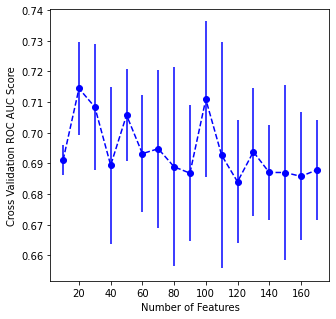

In [ ]:
# Plot the number of features against Cross-Validation ROC AUC Scores
plt.figure(figsize=(5,5))
x_axis = list(range(10, 180, 10))
plt.errorbar(x_axis, mean_cv, std_cv, marker='o', color='blue', linestyle='--')
plt.xlabel('Number of Features')
plt.ylabel('Cross Validation ROC AUC Score')
plt.show()

In [ ]:
'''
There does not appear to be a clear trend in relationship between the number of featurs and cross-validation scores.
However, there is a clear increase from the baseline MLPRegressor that was not hypertuned. The cross validation scores
increase range from approx 0.07 to 0.1.
'''

# Model 2: XGBoost
XGBoost was used because https://pubmed.ncbi.nlm.nih.gov/31455831/ notes that high accuracy is attained for predicting high or low risk of developing gastric cancer. In addition, since we have 189 features per datapoint, XGBoost can capture nonlinear relations among many input variables and outcomes using the boosting approach to ML.

In [ ]:
%pip install xgboost==1.0.1

In [ ]:
import xgboost
print(xgboost.__version__)

1.0.1


In [ ]:
# Evaluating XGBRegressor without any hyperparameter tuning

# define the model
model = XGBRegressor()
# evaluate the model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X_all_train_scaled, y_all_train, scoring='roc_auc', cv=cv)
# report performance

print("The mean of CV scores is {:.2f}".format(np.mean(n_scores)) )
print("The std of CV scores is {:.2f}".format(np.std(n_scores)) )

The mean of CV scores is 0.68
The std of CV scores is 0.04


In [ ]:
# Do hyperparameter tuning for XGBRegressor for the below parameters:
  # n_estimators = number of trees
  # max_depth = tree depth
  # rates = learning rate
  # subsample = number of samples to fit each tree
  # colsample_bytree = number of features to fit each tree

from hyperopt import hp
from hyperopt import fmin, tpe, space_eval, Trials
from sklearn.model_selection import cross_val_score
from numpy import arange


def hyperoptoutput2param(best):
    
    '''Change hyperopt output to dictionary with values '''
    
    for key in best.keys():
        if key in hyper_dict.keys():
            best[key] = hyper_dict[key][ best[key] ] 
            
    return best

# Define a dictionary for each parameter range 
hyper_dict = {
    "n_estimators": [10, 50, 100, 500, 1000, 5000],
    "max_depth": list(range(1,11)),
    "rates": [0.0001, 0.001, 0.01, 0.1, 1.0],
    "subsample": list(arange(0.1, 1.1, 0.1)),
    "colsample_bytree": list(arange(0.1, 1.1, 0.1))
}

parameter_space =  { "n_estimators": hp.choice("n_estimators", hyper_dict['n_estimators']),
            "max_depth": hp.choice("max_depth", hyper_dict['max_depth']), 
            "rates": hp.choice("rates", hyper_dict['rates']), 
            "subsample": hp.choice("subsample", hyper_dict['subsample']),
            "colsample_bytree": hp.choice("colsample_bytree", hyper_dict['colsample_bytree'])
                    }

# Evaluation function 
def model_eval(args):

    '''Take suggested arguments and perform model evaluation'''

    # your code here to train MLPRegressors and to run CV score on the training data 
    model = XGBRegressor(n_estimators=args["n_estimators"], max_depth=args["max_depth"], rates=args["rates"], subsample=args["subsample"], colsample_bytree=args["colsample_bytree"], early_stopping=False, verbosity = 0)
    
    # return the negative of the CV score to ensure we maximize R^2 by minimizing the loss
    cv_score = np.mean(cross_val_score(model, X_train_scaled, y_train, scoring='r2', cv=5))
    return cv_score


print("Start trials") 

trials = Trials()
best = fmin(model_eval, parameter_space, algo=tpe.suggest, max_evals=40, trials=trials) # this will take a while to run 
best = hyperoptoutput2param(best)

print("Best parameter set: {}".format(best))
print("Best loss from CV {:.2f}".format(-trials.best_trial['result']['loss']))

Start trials
100%|██████████| 40/40 [31:26<00:00, 47.17s/it, best loss: -0.4763332650999062]
Best parameter set: {'colsample_bytree': 0.7000000000000001, 'max_depth': 6, 'n_estimators': 5000, 'rates': 0.0001, 'subsample': 0.1}
Best loss from CV 0.48


In [ ]:
'''
Feature Selection with Univariate Statistical Tests
This preprocessing step is done to decrease the dimensionality of our data since
we have 189 features per datapoint, which can increase the possibility of overfitting
to our training dataset. Without domain knowledge, feature selection helps create
an accurate predictive model by identifying and removing irrelevant or unneeded
data attributes that do not contribute to the accuracy of a predictive model or
even decreases the accuracy of the model.
'''

# CROSS VALIDATION SCORES with feature Selection (Univariate Statistical Tests)

mean_cv = []
std_cv = []

# SelectKBest fit on train data, which selects the k best features
# iterate through k=10, 20, ..., 180 (exclusive) to find the best number of features that maximizes prediction accuracy
for i in range(10, 180, 10):
  print("Number of features:", i)
  # fit SelectKBest to the all the scaled X train data
  fit = SelectKBest(score_func=f_regression, k=i).fit(X_all_train_scaled, y_all_train)
  X_all_train_new = fit.transform(X_all_train_scaled)

  # fit the XGBRegressor (with optimized hyperparameters) to the all filtered X train data with k features
  # compute the mean and std of teh cross-validation scores
  regr = XGBRegressor(n_estimators=5000, max_depth=6, rates=0.0001, subsample=0.1, colsample_bytree=0.7000000000000001, early_stopping=True, verbosity = 0)
  n_scores = cross_val_score(regr, X_all_train_new, y_all_train, scoring='roc_auc', cv=5)
  mean_cv.append(np.mean(n_scores))
  std_cv.append(np.std(n_scores))
  
  # fit SelectKBest to the scaled X test data, fit the MLPRegressor to all the X train data, and make model predictions
  X_all_test_new = fit.transform(X_all_test_scaled)
  regr = regr.fit(X_all_train_new, y_all_train)
  model_pred = regr.predict(X_all_test_new)
  save_submission(X_test_df.index.tolist(), model_pred.tolist(), f'./xgb_{i}.csv')

Number of features: 10
Number of features: 20
Number of features: 30
Number of features: 40
Number of features: 50
Number of features: 60
Number of features: 70
Number of features: 80
Number of features: 90
Number of features: 100
Number of features: 110
Number of features: 120
Number of features: 130
Number of features: 140
Number of features: 150
Number of features: 160
Number of features: 170


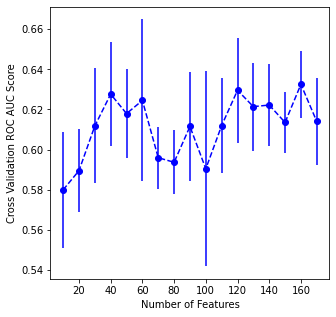

In [ ]:
# Plot the number of features against Cross-Validation ROC AUC Scores
plt.figure(figsize=(5,5))
x_axis = list(range(10, 180, 10))
plt.errorbar(x_axis, mean_cv, std_cv, marker='o', color='blue', linestyle='--')
plt.xlabel('Number of Features')
plt.ylabel('Cross Validation ROC AUC Score')
plt.show()

In [ ]:
'''
Even after hyperparameter tuning and data pre-processing, the cross validation scores for any number of features
is less than the baseline scores (which was originally 0.68),
'''

# Model 3: Random Forest Regressor
Random Forest Regressor was selected because it performs well on numerical data, implicitly perform feature selection (since we have lots of features - 189 - for each datapoint), and can handle outliers.

In [ ]:
# RandomForestClassifier model w/o hyperparameter tuning
model = RandomForestClassifier()
scores = cross_val_score(model, X_all_train_scaled, y_all_train, scoring='roc_auc', cv=5)

print("The mean of CV scores is {:.2f}".format(np.mean(scores)) )
print("The std of CV scores is {:.2f}".format(np.std(scores)) )

The mean of CV scores is 0.72
The std of CV scores is 0.02


In [ ]:
# Do hyperparameter tuning for RandomForestRegressor for the below parameters using RandomizedSearchCV:
  # n_estimators: Number of trees in random forest
  # max_depth: Maximum number of levels in tree
  # max_features: maximum number of features to consider for splitting a node
  # min_samples_split: Minimum number of samples required to split a node
  # min_samples_leaf: Minimum number of samples required at each leaf node
from sklearn.model_selection import RandomizedSearchCV

forest = RandomForestClassifier()

# Create the grid parameter:
random_grid = {'n_estimators': [100, 120, 150],
           'criterion': ['entropy', 'gini'], 
           'max_depth': [None,1,3,5,7,9],
           'max_features': range(1,11),  
           'min_samples_split': range(2, 10),
					 'min_samples_leaf': [1,3,5]}

# Create the grid:
rs_rf = RandomizedSearchCV(forest, random_grid, cv=3, n_jobs=-1)

# Fit using grid search:
rs_rf.fit(X_all_train_scaled, y_all_train)

# Print best accuracy and best parameters:
print('Best accuracy: %.3f' % rs_rf.best_score_)
print('\nBest params:\n', rs_rf.best_params_)

Best accuracy: 0.764

Best params:
 {'n_estimators': 100, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_features': 8, 'max_depth': None, 'criterion': 'entropy'}


In [ ]:
'''
After hyperparameter tuning, there was a 0.04 increase in cross validation ROC AUC score.
'''

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# CROSS VALIDATION SCORES with feature Selection (Univariate Statistical Tests)
mean_cv = []
std_cv = []
for i in range(10, 180, 10):
  print("Number of features:", i)
  # fit SelectKBest to the all the scaled X train data
  fit = SelectKBest(score_func=f_regression, k=i).fit(X_all_train_scaled, y_all_train)
  X_all_train_new = fit.transform(X_all_train_scaled)

  # fit the MLPRegressor (with optimized hyperparameters) to the all filtered X train data with k features
  # compute the mean and std of teh cross-validation scores
  regr = RandomForestRegressor(n_estimators=100, max_features=8, max_depth=None, min_samples_split=3, min_samples_leaf=1)
  n_scores = cross_val_score(regr, X_all_train_new, y_all_train, scoring='roc_auc', cv=5)
  mean_cv.append(np.mean(n_scores))
  std_cv.append(np.std(n_scores))
  
  # fit SelectKBest to the scaled X test data, fit the MLPRegressor to all the X train data, and make model predictions
  X_all_test_new = fit.transform(X_all_test_scaled)
  regr = regr.fit(X_all_train_new, y_all_train)
  model_pred = regr.predict(X_all_test_new)
  save_submission(X_test_df.index.tolist(), model_pred.tolist(), f'./rf_{i}.csv')

Number of features: 10
Number of features: 20
Number of features: 30
Number of features: 40
Number of features: 50
Number of features: 60
Number of features: 70
Number of features: 80
Number of features: 90
Number of features: 100
Number of features: 110
Number of features: 120
Number of features: 130
Number of features: 140
Number of features: 150
Number of features: 160
Number of features: 170


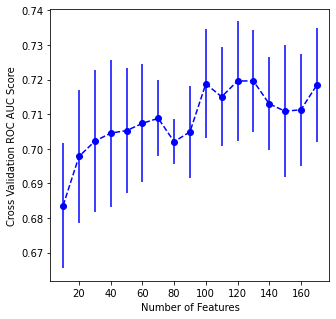

12


In [ ]:
# Plot the number of features against Cross-Validation ROC AUC Scores
plt.figure(figsize=(5,5))
x_axis = list(range(10, 180, 10))
plt.errorbar(x_axis, mean_cv, std_cv, marker='o', color='blue', linestyle='--')
plt.xlabel('Number of Features')
plt.ylabel('Cross Validation ROC AUC Score')
plt.show()

print(mean_cv.index(max(mean_cv)))

In [ ]:
'''
So the best cv score is attained with 130 features, and this attained the highest score over all three models.
'''

Interpretability for Random Forest Regressor

[0.005052   0.00764259 0.01749626 0.01058541 0.01077311 0.002332
 0.0081899  0.00682283 0.00048994 0.00788071 0.00781154 0.00351111
 0.00655756 0.00619731 0.00207499 0.00487729 0.00636483 0.01165455
 0.01044907 0.00345145 0.00391057 0.0026678  0.0035055  0.00637158
 0.00540816 0.00369714 0.00346748 0.00174314 0.00252187 0.00259343
 0.00319759 0.00511612 0.0108997  0.00631703 0.00902815 0.0029783
 0.01543801 0.00289806 0.00138048 0.00523456 0.01243207 0.00095206
 0.00230286 0.0032607  0.00463775 0.00200979 0.01701222 0.00366239
 0.0024289  0.01461421 0.00271217 0.01387213 0.00092164 0.00449916
 0.01043168 0.00512486 0.00778448 0.00135279 0.00165041 0.04399439
 0.00637375 0.00337301 0.01223002 0.00832204 0.00766849 0.00655626
 0.02852884 0.00202533 0.00625244 0.00335593 0.00395642 0.00411239
 0.00204528 0.00189306 0.00628143 0.00228778 0.01308842 0.0068857
 0.0111496  0.01126725 0.01212929 0.01037394 0.00816792 0.00713087
 0.00822378 0.00921988 0.01422136 0.01415789 0.01545135 0.00604168

Text(0.5, 1.0, 'Random Forest Feature Importance (Top 10)')

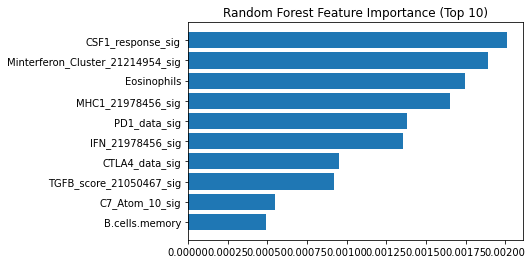

In [ ]:
i = 130 # Use the k number of features that maximizes cv score
fit = SelectKBest(score_func=f_regression, k=i).fit(X_all_train_scaled, y_all_train)
X_all_train_new = fit.transform(X_all_train_scaled)
regr = RandomForestRegressor().fit(X_all_train_new, y_all_train)

'''
Use the Gini importance to interpret the importance of each feature. This is done
by measuring how much each feature contributes to information gain at each classification
task at an internal node.
'''
features_importance = regr.feature_importances_
print(features_importance)
sorted_idx = regr.feature_importances_.argsort()
plt.barh(X_train_df.columns[sorted_idx][:10], regr.feature_importances_[sorted_idx][:10])
plt.title("Random Forest Feature Importance (Top 10)")

In [ ]:
'''
Overall, hypertuned Random Forest Regressor after Feature selection with k=130 yielded the highest scores.
'''